In [1]:
import string 
import random

# Making a random site to crawl

## Make a random name for each page

In [2]:
cc = string.ascii_lowercase

def name():
    return 'X_'+ ''.join(random.choices(cc,k=3)) + '.html'

In [3]:
name()

'X_qat.html'

# Make a random adjacency matrix

we want the graph to be connected so 

- we start  with a [cycle](https://en.wikipedia.org/wiki/Cycle_graph#:~:text=In%20graph%20theory%2C%20a%20cycle,vertices%20is%20called%20Cn.)
- add a random matrix of 1,0
- clamp the values to 1,0

the matrix is not necessarily symmetric.

In [5]:
import numpy as np

n = 7
M = np.identity(n,dtype=int)
# this slides everything over by 1
M = np.roll(M,1, axis=1)

M = M + np.random.randint(2,size=(n,n))
M[M>1] = 1

# don't allow self references
for k, r in enumerate(M):
    r[k] = 0


In [16]:
M

array([[0., 1., 0., 1., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0.]])

In [7]:
sites = [name() for k in range(n)]
lks = dict(zip(sites,M))


In [8]:
for x, ll in lks.items():
    lks[x] = [ x for x,y in zip(sites,ll) if y >0]

In [9]:
lks

{'X_feb.html': ['X_jmf.html', 'X_hbi.html', 'X_upi.html', 'X_eoh.html'],
 'X_jmf.html': ['X_feb.html',
  'X_hbi.html',
  'X_upi.html',
  'X_joe.html',
  'X_ztj.html'],
 'X_hbi.html': ['X_feb.html', 'X_upi.html'],
 'X_upi.html': ['X_feb.html',
  'X_jmf.html',
  'X_hbi.html',
  'X_joe.html',
  'X_ztj.html'],
 'X_joe.html': ['X_jmf.html', 'X_ztj.html'],
 'X_ztj.html': ['X_hbi.html', 'X_joe.html', 'X_eoh.html'],
 'X_eoh.html': ['X_feb.html', 'X_jmf.html']}

In [71]:
lks = {'X_lzx.html': ['X_ask.html', 'X_hvc.html', 'X_lnh.html', 'X_dbo.html'],
 'X_ask.html': ['X_lzx.html',
  'X_ask.html',
  'X_hvc.html',
  'X_lnh.html',
  'X_cgg.html',
  'X_ifl.html'],
 'X_hvc.html': ['X_hvc.html', 'X_lnh.html', 'X_cgg.html', 'X_dbo.html'],
 'X_lnh.html': ['X_hvc.html', 'X_cgg.html', 'X_ifl.html'],
 'X_cgg.html': ['X_ask.html', 'X_hvc.html', 'X_lnh.html', 'X_dbo.html'],
 'X_dbo.html': ['X_ask.html', 'X_hvc.html', 'X_lnh.html', 'X_ifl.html'],
 'X_ifl.html': ['X_lzx.html', 'X_hvc.html', 'X_lnh.html', 'X_cgg.html']}

In [92]:
for x, ll in lks.items():
    with open(x,'w') as fp:
        fp.write('# ' + x + '<br>\n'*3 )
        body = ''.join(['<a href="./{}"> {}</a> <br>\n'.format(y,y) for  y in ll])
        fp.write(body)

In [1]:
! ../.g

[master 1695a2c] web
 10 files changed, 1465 insertions(+), 40 deletions(-)
 create mode 100755 DEMO/.ipynb_checkpoints/mk_slides2-checkpoint.py
 create mode 100644 PROG/.ipynb_checkpoints/extract_quotes-checkpoint.ipynb
 create mode 100644 PROG/extract_quotes.ipynb
 create mode 100644 PROG/imagination_is_more.mp3
 create mode 100644 PROG/script.json
Counting objects: 13, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (13/13), done.
Writing objects: 100% (13/13), 59.43 KiB | 2.20 MiB/s, done.
Total 13 (delta 6), reused 0 (delta 0)
remote: Resolving deltas: 100% (6/6), completed with 6 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   ac525cf..1695a2c  master -> master


## Crawler code

My crawler is very simple. There are just 2 objects:
- a queue of pages to be treated ```todo```
- a dictionary of pages containing lists of lks for each page ```nodes```

---

- get the first element off ```todo```
- skip if I've already treated it
- otherwise download the page, get the lks and put them in ```nodes```



In [11]:
import requests
import re

pax = re.compile('<a href="(.*?)">', re.DOTALL)

base = 'https://macbuse.github.io/PROG/SCRAPE/'
root = 'X_aoy.html'

todo = [root]
nodes = {}

k = 0
while todo:
    #accounting
    print(k)
    k += 1
    
    parent = todo.pop()
    if parent in nodes.keys(): continue
    #process a new node
    r = requests.get(base + parent)
    children = [ x[2:] for x in pax.findall(r.text)]
    nodes[parent] = children
    # I'm not going to do anything clever to eliminate multiple copies
    todo.extend(children)
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [6]:
https://macbuse.github.io/PROG/SCRAPE/X_aoy.html

SyntaxError: invalid syntax (1469584418.py, line 1)

In [12]:
nodes

{'X_aoy.html': ['X_bqe.html', 'X_lbv.html', 'X_suk.html', 'X_wwv.html'],
 'X_wwv.html': ['X_fyp.html', 'X_lbv.html', 'X_mpn.html', 'X_aoy.html'],
 'X_mpn.html': ['X_suk.html'],
 'X_suk.html': ['X_bqe.html', 'X_aoy.html', 'X_wwv.html'],
 'X_bqe.html': ['X_fyp.html',
  'X_lbv.html',
  'X_suk.html',
  'X_aoy.html',
  'X_wwv.html'],
 'X_lbv.html': ['X_mpn.html'],
 'X_fyp.html': ['X_bqe.html', 'X_suk.html']}

In [13]:
import numpy as np

In [14]:
pages = list(nodes.keys())

n = len(pages)
M = np.zeros((n,n))

for k, p in enumerate(pages):
    #this is a trick to fill out each line
    M[k, [pages.index(x) for x in nodes[p] ] ]  = 1

In [22]:
pages

['X_aoy.html',
 'X_wwv.html',
 'X_mpn.html',
 'X_suk.html',
 'X_bqe.html',
 'X_lbv.html',
 'X_fyp.html']

In [17]:
import networkx as nx

def show_graph(adjacency_matrix, my_labels=None):
    
    #rows, cols = np.where(adjacency_matrix == 1)
    #edges = zip(rows.tolist(), cols.tolist())
    edges = np.vstack( np.nonzero(adjacency_matrix) ).T
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    pos = nx.spring_layout(gr) 
    
    if not my_labels:
        my_labels = {k : k for k in range(adjacency_matrix.shape[0])} 
    nx.draw(gr, pos, node_size=500,
            connectionstyle='arc3, rad = 0.1',
            labels=my_labels, with_labels=True)
    

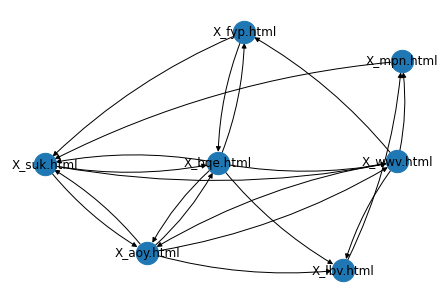

In [27]:
show_graph(M, my_labels = dict(enumerate(pages)))

# Wikipedia trail

- Look at the page
[Wikipedia:Getting_to_Philosophy](https://en.wikipedia.org/wiki/Wikipedia:Getting_to_Philosophy)
on the right you can see a script doing the crawl.
- Do a Google search for the script ```scraper.py```

You should get to [this page](https://medium.com/tech-insider/task-crawling-first-link-of-wikipedia-recursively-to-reach-the-philosophy-page-9f5bcc770a60).
Now copy the script and try to get it to work!!!

---

## Discussion

Web pages are created from databases by robots.
Sometimes the format of the web page changes 
and so the crawler won't find what you are looking for.
This script no longer works but it should be easy
for you to fix it.

---

What-back-end-infrastructure for [wikipedia](https://www.quora.com/What-back-end-infrastructure-technologies-does-Wikipedia-use)

Probably Wikimedia servers is a good place to start looking at how the backend works. Its pretty complex. Some of the components include

- Master SQL database running MariaDB.
- Several Slave databases also running MariaDB.
- Application Servers running Apache and MediaWiki.
- HTTP Cache servers which serve pre compiled pages. Running Varnish HTTP Cache
- Load balancing systems. running LVS





In [46]:
import time, re
import urllib

#import bs4
import requests

start_url = "https://en.wikipedia.org/wiki/Special:Random"
target_url = "https://en.wikipedia.org/wiki/Philosophy"

# I changed so I don't use bs4
# extract paragraphs
pp = re.compile('<p>(.*?)</p>', re.DOTALL)
pax = re.compile(r'<a href="(.*?)".*?>(.*?)</a>', re.DOTALL)
# this is a better pattern extract links outside of the page
pax = re.compile(r'<a href="([^#]*?)".*?>(.*?)</a>', re.DOTALL)

def find_first(url):
    # this function defines 2 functions
    # in its **local** scope 
    
    def bad_lk(x):
        return ':' in x
        return ('Help:' in x) or ('File:' in x)
    
    def remove_text_between_parens(text):
        #https://stackoverflow.com/questions/37528373/
        n = 1  
        while n:
            # remove non-nested/flat balanced parts
            text, n = re.subn(r'\([^()]*\)', '', text) 
        return text
    
    response = requests.get(url)

    html = remove_text_between_parens(response.text)
    
    # sometimes there are none like for Categories
    paras = pp.findall(html)
    if not paras: return
    
    # this is a primitive filter 
    # I added this  so that we never get to Categories
    lks = [lk for lk in pax.findall(''.join(paras)) if not bad_lk(lk[0])]
    if not lks: return
    
    article_link = lks[0]
    print(article_link)
    
    #I wouldn't import urllib just to do this
    return urllib.parse.urljoin('https://en.wikipedia.org/', article_link[0])

def continue_crawl(search_history, target_url, max_steps=25):
    if search_history[-1] == target_url:
        print("We've found the target article!")
        return False
    elif len(search_history) > max_steps:
        print("The search has gone on suspiciously long, aborting search!")
        return False
    elif search_history[-1] in search_history[:-1]:
        print("We've arrived at an article we've already seen, aborting search!")
        return False
    else:
        return True

article_chain = [start_url]

while continue_crawl(article_chain, target_url): 
    
    first_link = find_first(article_chain[-1])
    if not first_link:
        print("We've arrived at an article with no links, aborting search!")
        break

    article_chain.append(first_link)
    # slow down otherwise wiki server will block you
    time.sleep(2) 

('/wiki/Rodent', 'rodents')
('/wiki/Anomaluromorpha', 'Anomaluromorpha')
('/wiki/Anomaluridae', 'Anomaluridae')
('/wiki/Anomalurus', 'Anomalurus')
('/wiki/Anomalurus_beecrofti', 'A. beecrofti')
('/wiki/Rodent', 'rodent')
We've arrived at an article we've already seen, aborting search!


In [38]:
url = "https://en.wikipedia.org/wiki/Epistemology"

pax = re.compile(r'<a href="([^#]*?)".*?>(.*?)</a>', re.DOTALL)

response = requests.get(url)
html = response.text

html = re. sub('\(.*\)', '', response.text)

pp.findall(html)


['<b>Core concepts</b>\n',
 '<b>Distinctions</b>\n',
 '<b>Schools of thought</b>\n',
 '<b>Topics and views</b>\n',
 '<b>Specialized domains of inquiry</b>\n',
 '<b>Notable epistemologists</b>\n',
 '<b>Related fields</b>\n',
 '<b>Traditions by region</b>\n',
 '<b>Traditions by school</b>\n',
 '<b>Traditions by religion</b>\n',
 '<b>Epistemology</b> ">justification</a>, the <a href="/wiki/Reason" title="Reason">rationality</a> of <a href="/wiki/Belief" title="Belief">belief</a>, and various related issues. Epistemology is considered one of the four main branches of philosophy, along with <a href="/wiki/Ethics" title="Ethics">ethics</a>, <a href="/wiki/Logic" title="Logic">logic</a>, and <a href="/wiki/Metaphysics" title="Metaphysics">metaphysics</a>.<sup id="cite_ref-Britannica_1-0" class="reference"><a href="#cite_note-Britannica-1">&#91;1&#93;</a></sup>\n',
 'Debates in epistemology are generally clustered around four core areas:<sup id="cite_ref-SEP_Epistemology_2014_2-0" class="refer

In [51]:
txt = ''.join(pp.findall(html))
pax.findall(txt)

['/wiki/Vine',
 '/wiki/Apocynaceae',
 '/wiki/Indomalaya',
 '/wiki/Australasia',
 '/wiki/Melanesia',
 '#cite_note-u-1',
 '/wiki/Leaf',
 '#cite_note-NSW-2',
 '/wiki/Latex',
 '#cite_note-NSW-2',
 '#cite_note-NSW-2',
 '/wiki/Robert_Brown_(botanist,_born_1773)',
 '/wiki/Wernerian_Natural_History_Society',
 '#cite_note-APNI-3',
 '/wiki/James_Parsons_(physician)',
 '/wiki/Royal_Society',
 '#cite_note-4',
 '/wiki/Conserved_name',
 '/wiki/Homonym',
 '/wiki/Patrick_Browne',
 '/wiki/Lythraceae',
 '/wiki/Cuphea',
 '#cite_note-GRIN-5',
 '/wiki/Artia_(plant)',
 '/wiki/Prestonia_(plant)',
 '#cite_note-6',
 '#cite_note-7',
 '#cite_note-u-1',
 '#cite_note-18',
 '#cite_note-FONZ-11']

In [108]:
! ../.g

[master 9cbf06d] web
 1 file changed, 84 insertions(+), 182 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1.64 KiB | 838.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   3057a2c..9cbf06d  master -> master
